# Scikit-learn Library in Python

## 1 Introduction 

Scikit-learn library is a simple and efficient tool for data mining and data analysis. In addition, it is a Open Source, commerciable usable BDS licence. 

Scikit-learn is build on:
* NumPy
* SciPy 
* Matplotlib.

What we can achieve with the Scikit-learn library? 

a) Apply the regression and classification methods of Machine Learning:

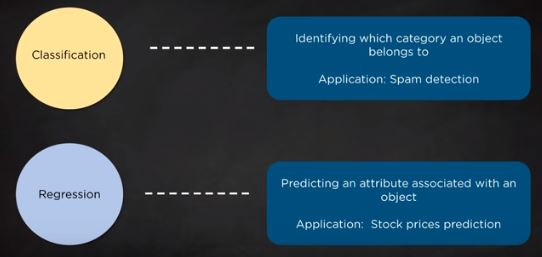

In [44]:
from IPython.core.display import Image
Image("SklearnGoal.JPG")

b) Perform Clustering and select the properly ML model to find the solution of the problem:

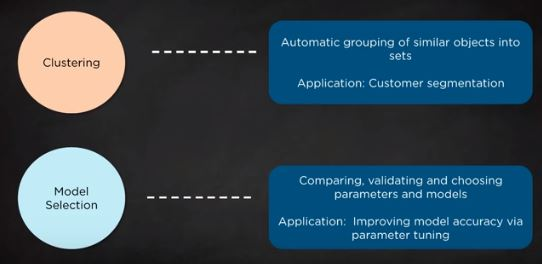

In [2]:
Image("SklearnGoal2.JPG")

c) Increase the model efficiency and Pre-processing:

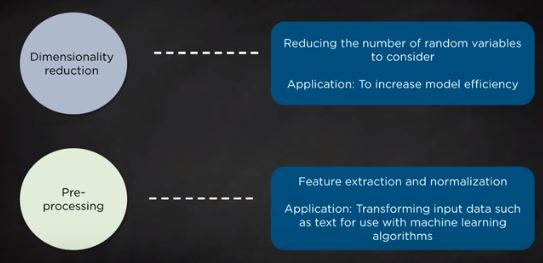

In [3]:
Image("SklearnGoal3.JPG")

## 2 Importing required packages 

In [31]:
import pandas as pd  #data management and data analysis
import seaborn as sn # data visualization
import matplotlib.pyplot as plt # data visualization
import sklearn #machine learning library

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm # support vector machine
from sklearn.svm import SVC #support vector classifier
#from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report #sklearn metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

#standarscaler => pre-processing

#open a new window and display the graphics in that way
%matplotlib inline 

## 3 Explore the data 

In this document we will predict the quality of the Portuguese red wine, using the dataset called 'winequality-red.csv'. You can find the path to download the dataset in the folling Kaggle link:

[Red Wine Quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)

In [32]:
#load the dataset
wine = pd.read_csv('winequality-red.csv', sep = ',')
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Check the type of information that is part of the data frame:

In [33]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Check if there are null values in the data frame:

In [34]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 4 Data Processing 

In [35]:
#split the data frame in two bins related to the quality of the wine ('bad quality', 'good quality') 
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels = group_names)
wine['quality'].unique()

[bad, good]
Categories (2, object): [bad < good]

In [36]:
#Use the Label Encoder class to convert the categorical text data ('bad' and 'good') into model-understandable numerical data
label_quality = LabelEncoder()

In [37]:
#Transform the text into binary numerical data with the pre-processing method
wine['quality'] = label_quality.fit_transform(wine['quality']) #perform the transformation

#display the data
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [38]:
#count the number of records of the quality groups
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

## 5 Prediction and Evaluation 

### 5.1 Response and Feature Variables 

Firstly, separate the dataset into response variables (data to analyze) and feature variables (the target to achieve).

In [39]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

# X variable = store the data
# y variable = store the classes/targets

### 5.2 Training and Test Split

Secondly, split the data into training set and testing set, using the package train_test_split.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Now, let's standardize the category units with the StandardScaler() object, which unifies the weighting of the variables. So, we avoid that the model gives more relevance to one variable than another. This is useful when the dataframe has very scattered data.

In [41]:
#Applying Standard Scaling to get optimized results

sc = StandardScaler()
X_train = sc.fit_transform(X_train) #perform the transformation
X_test = sc.transform(X_test)

### 5.3 Random Forest Classifier 

Random Forest is a technique based on decision trees used to reproduce what-if predictive scenarios. Therefore, we can saw which variables could predict a specific objective variable and know the importance of each variable.

In [42]:
#Set up the Random Forest algorithm and the number of trees that we are going to build
rfc = RandomForestClassifier(n_estimators = 250)

#Build the model on training data
rfc.fit(X_train, y_train)

#Predict the values of test group
pred_rfc = rfc.predict(X_test)

Let's see how our model performed, using the objects Classification_report and confussion_matrix:

In [43]:
#classification report
print(classification_report(y_test, pred_rfc))

#confussion matrix
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       273
           1       0.76      0.53      0.62        47

    accuracy                           0.91       320
   macro avg       0.84      0.75      0.79       320
weighted avg       0.90      0.91      0.90       320

[[265   8]
 [ 22  25]]


Comments: In general, the prediction of the model is good.

### 5.4 SVM Classifier  

In [47]:
#Set up the SVM Classifier algorithm
clf =svm.SVC()
#Build the model on training data
clf.fit(X_train, y_train)
#Predict the values of test group
pred_clf = clf.predict(X_test)

Let's see how our model performed, using the objects Classification_report and confussion_matrix:

In [48]:
#classification report
print(classification_report(y_test, pred_clf))

#confussion matrix
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


Comments: In general, the prediction of the model is quite good.

### 5.5 Neuronal Network   

In [51]:
from sklearn.neural_network import MLPClassifier 
#Set up the Neural Network Classifier algorithm
nlpc = MLPClassifier(hidden_layer_sizes = (11, 11, 11), max_iter = 500)
#Build the model on training data
nlpc.fit(X_train, y_train)
#Predict the values of test group
pred_nlpc = clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Let's see how our model performed, using the objects Classification_report and confussion_matrix:

In [52]:
#classification report
print(classification_report(y_test, pred_nlpc))

#confussion matrix
print(confusion_matrix(y_test, pred_nlpc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


Comments: The results of the Neural Network classifier are very similar to the Random Forest classifier. Therefore, in general, the prediction of the model is quite good.

### 5.6 Accuracy Score 

In [53]:
from sklearn.metrics import accuracy_score
#Accuracy score of Random Forest Classifier
cm = accuracy_score(y_test, pred_rfc)
cm

0.90625

In [54]:
#Accuracy score of SVM Classifier
cm1 = accuracy_score(y_test, pred_clf)
cm1

0.875

In [55]:
#Accuracy score of Neuronal Network Classifier
cm2 = accuracy_score(y_test, pred_nlpc)
cm2

0.875

### 5.7 Prediction with new values 

In [56]:
#Set up the new values to analyze
X_new = [[7.3, 0.58, 0.00, 2.0, 0.065, 15.0, 21.0, 0.9946, 3.36, 0.47, 10.]]

#Applying Standard Scaling to get optimized results
X_new = sc.transform(X_new)

#Predict the values of the test group
y_new = rfc.predict(X_new)

y_new

array([0])

Results: The quality of the wine predictes with the new values is bad (value 0)

## 6 Annex 

Interpretation of the Classification Report:
* Precision is the ability of a classiifer not to label an instance positive that is actually negative (True Negative Rate).
* Recall is the ability of a classifier to find all positive instances (Rate of True Positive).
* The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. 
* Support is the number of actual occurrences of the class in the specified dataset

For more details, please check the official documentation:
[Classification Report](https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html)

Interpretation of the Confussion Matrix:

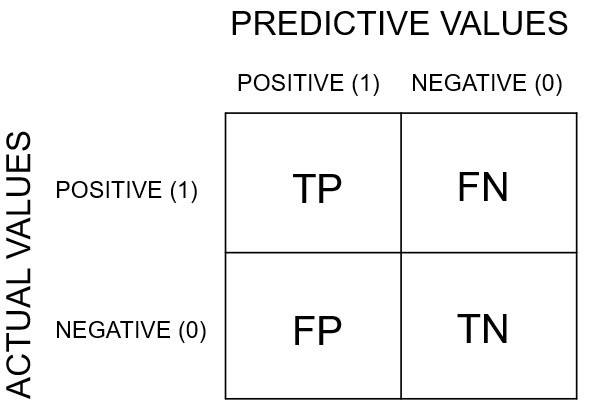

In [45]:
Image("ConfussionMatrix.jpg")